# THE BATTLE OF NEIGHBORHOODS- COMPARING SERVICE BUSINESSES IN NEW DELHI AND TORONTO

## TABLE OF CONTENT 
- [Introduction: Business Problem](#Introduction)
- [Data Acquisition and Cleaning](#Data_Acquisition_and_Cleaning)
- [Methodology](#Methodology)
- [Result](#Result)
- [Conclusion](#Conclusion)

## Introduction: Business Problem

New Delhi and Toronto are the capital cities of India and Canada, respectively. They are also the major financial cities of their countries. New Delhi, being the capital of a very densely populated country boasts a population of about 1.9 crore and is highly densely populated. Canada on the other hand has a total population of 3.76 crore, with Toronto holding 29.3 lakh individuals amongst them. Different cultures in different cities tend to affect the mannerism of the functioning of the economies of these cities. The objective of this project is to analyze the service economies of these two cities on different corners of the world and see how they compare with one another. 

With the difference in the population of these two cities, the top services that are up and running in the neighborhoods and contributing majorly to the economy of that neighborhood may differ. The type of services that are preferred around a certain neighborhood speaks volumes about the income and lifestyle of the inhabitants residing over there. Thus, information about neighborhoods of the form are crucial in making decisions about setting up major businesses in the area. 

This project can act as a key source of information to parties considering investing in a certain service business in these two major cities. It can widely be helpful for an investor living in one of these cities and willing to invest in another. 


## Data Acquisition and Cleaning

### Data Sources 

The data of the Borough, Neighborhoods, geospatial co-ordinates, and businesses running in the city neighborhoods are required for the task at hand. The data of neighborhoods of the New Delhi have been obtained from a Kaggle set (https://www.kaggle.com/shaswatd673/delhi-neighborhood-data?select=delhi_dataSet.csv) and that for Toronto have been obtained using a Wikipedia page (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M).

The latitude and longitude data for New Delhi and Toronto have been obtained from a python package called geopy. 

In order to locate the venues around different Boroughs and neighborhoods present in the city of New Delhi and Toronto, I have used Foursquare. Foursquare is an open source site that can bring in information of different locations to explore around a certain neighborhood. This may include tourist attraction sites, restaurants, shops, etc.  

### Data Cleaning

The information that was obtained on the neighborhoods of the two cities was a clean data that listed the Boroughs and Neighborhoods of the two cities. The required data is the Borough Name, Neighborhood name, latitude and the longitude of the particular neighborhood. This data will be stored in dataframes of the two different cities. 

On obtaining the data for the neighborhood businesses using Foursquare, the results were returned in the form of a json file with several credentials listing business referral ID, name, reviews, etc. The only data that was specifically required for the analysis that is being done was the data on the name, category of business, latitude, and longitude of the certain venue. This data was scraped and converted into a neat and readable pandas Data Frame. 

The total neighborhoods returned from the New Delhi database were 185, out of which total information, that includes geospatial location data was only available for 163 of them. Thus, the neighborhoods with no location data had to be annulled. As for Toronto, a total number of 103 Boroughs were returned with full geospatial location data. Some of the neighborhoods that did not have a Borough name mentioned were annulled from the data frame. 


## Methodology

The analysis in the project have been done in a Python environment. I have used Jupyter notebook to implement my codes and have used several Python Libraries such as Pandas, NumPy, Beautiful Soup, geopy, Matplotlib, Seaborn, etc. The first step in the project is to gather data from all the sources that were listed. The following steps will be undertaken as a part of the analysis that will be done in the project:
- Neighborhood Data Gathering
- Neighborhood Data cleaning
- Venues Data gathering using Foursquare
- Venue Data Cleaning
- Listing top businesses in a particular neighborhood
- Using K-Means to Cluster the neighborhoods based on their top businesses
- Analyzing the Clusters obtained

<b> 1. Neighborhood Data Gathering and Cleaning </b>

<b>New Delhi Data </b>

The data of New Delhi will be gathered from the file that is mentioned in the data acquisition section. This data is supposed to be converted into a readable data frame and cleaned to fit the data that is required for analysis. The latitude and longitude of New Delhi are also found out using geolocator. 

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import requests #library to handle requests
from bs4 import BeautifulSoup #library to parse HTML documents
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

In [2]:
#importing the data from the wikipedia page
csv_path=r'C:\Users\Aqdus\Downloads\delhi_dataSet.csv'
newdelhi_data=pd.read_csv(csv_path)
newdelhi_data=newdelhi_data[['Borough','Neighborhood','latitude','longitude']]
newdelhi_data.dropna(inplace=True)

print('The total neighborhoods reported in Delhi are {}'.format(newdelhi_data.shape[0]))

#locating the geographical co-ordnates of New Delhi
address1 = 'New Delhi, IN'

geolocator1 = Nominatim(user_agent="nd_explorer")
location1 = geolocator1.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of New Delhi are {}, {}.'.format(latitude1, longitude1))

newdelhi_data.head()

The total neighborhoods reported in Delhi are 163
The geograpical coordinate of New Delhi are 28.6138954, 77.2090057.


,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
5,North West Delhi,Dhaka,39.031714,-90.261223


The neighborhoods can be pictured using a folium map.

In [3]:
newdelhi_map=folium.Map(location=[latitude1,longitude1], zoom_start=10)
for latitude, longitude, Borough, Neighbourhood in zip(newdelhi_data['latitude'], newdelhi_data['longitude'], newdelhi_data['Borough'], newdelhi_data['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(newdelhi_map)  
    
newdelhi_map

<b>Toronto Data </b>

The data of Toronto is present in a HTML document. We will use Beautiful Soup to parse the HTML file and convert this into a Pandas Dataframe. The geospatial co-ordinates of the neighborhoods of Toronto are stored in another file which will also be scraped. The datasets will be combined. This will then be cleaned and the coordinates of Toronto will be found out using geolocator. 

In [4]:
#importing the data from the wikipedia page
url_data='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response=requests.get(url_data) #to send HTTPS request
print(response.status_code)

#parsing the data from HTML into a beautifulsoup object
soup=BeautifulSoup(response.text,'html.parser')
toronto_data=soup.find('table',{'class':"wikitable"})

#converting the Wikitable to a DataFrame
df_toronto_data=pd.read_html(str(toronto_data)) #made a list
df_toronto_data=pd.DataFrame(df_toronto_data[0]) #converting list to DataFrame

#drop the rows which do not have Borough assigned to them. 
i=df_toronto_data[(df_toronto_data.Borough=='Not assigned')].index
df_toronto_data.drop(i, inplace=True)
df_toronto_data.reset_index(drop=True, inplace=True)

#replace the neighbourhoods that are not assigned with their Borough name
for j in enumerate(df_toronto_data):
    if ('Neighbourhood' =='Not assigned'):
        df_toronto_data['Neighbourhood'].replace('Not assigned',df_toronto_data.loc[j,'Borough'],inplace=True)

#printing the number of rows in the dataframe
print('The number of rows in the dataframe are {}'.format(df_toronto_data.shape[0]))

### Part 2: Locating the latitudes and longitudes of the postal codes

#importing the co-ordinates dataframe
csvpath_geocords='http://cocl.us/Geospatial_data'
df_geo_cords=pd.read_csv(csvpath_geocords)

#merging the co-ordinates dataframe and the main postal dataframe
df_toronto=pd.merge(left=df_toronto_data,right=df_geo_cords,left_on='Postal Code',right_on='Postal Code')

#Use the geopy library to get the geographical co-ordinates of Toronto
address2 = 'Toronto, CA'
geolocator2 = Nominatim(user_agent="to_explorer")
location2 = geolocator2.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude2, longitude2))

df_toronto.head()

200
The number of rows in the dataframe are 103
The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Visualizing the neighborhoods of Toronto with Folium Map.

In [5]:
#Create a map of Toronto with Boroughs
toronto_map=folium.Map(location=[latitude2,longitude2], zoom_start=10)
for Latitude, Longitude, Borough, Neighbourhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

<b> 2. Using Foursquare to obtain data on the venues </b>

Foursquare is a platform that is useful in obtaining location-based data. Its API can be used to obtain data on neighborhoods of a certain city, such as places to explore, their exact locations, their reviews, their services, etc. The first step in using Foursquare is to set up a developer account on Foursquare to use their API and obtain your credentials. A URL has to be setup in order to use the API and the results will be returned in the form of a json file, that includes the venue categories, name, location, ID, etc. Only the useful information will be extracted and converted into a pandas data frame. This dataframe will include the Borough name, Neighborhood, Latitude and Longitude of the neighborhood, the Venue name, the venue location and the venue category.

In [6]:
CLIENT_ID = '0Z3GNZ2WYZX2WRSGAI1UBMC4ZRX3NSELLLVQ5XMVGCFQHC5B' # your Foursquare ID
CLIENT_SECRET = 'CY15FQM3VWOTWMODDOLVS1ZZVOBA3CDXUGFL35NCYWSS0W0X' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#creating a foursquare function to obtain venues around a certain neighbourhood

def getvenues(borough,neighborhood,latitude,longitude,radius=1000):
    venues=[]
    for borough,neighborhood,latitude,longitude in zip(borough,neighborhood,latitude,longitude):        
        #set up the foursquare API
        url_newdelhi='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,latitude,longitude,radius)
        
        
        try:
            results = requests.get(url_newdelhi).json()["response"]['groups'][0]['items']
        except KeyError:
            continue
            
            
        # return only relevant information for each nearby venue
        venues.append([(
            borough,
            neighborhood,
            latitude, 
            longitude,  
            k ['venue']['name'],
            k ['venue']['location']['lat'], 
            k ['venue']['location']['lng'],  
            k ['venue']['categories'][0]['name']) for k in results])

        given_venues = pd.DataFrame([item for venues in venues for item in venues])
        given_venues.columns = ['Borough','Neighborhood', 
                   'Neighborhood Latitude', 
                   'Neighborhood Longitude', 
                   'Venue', 
                   'Venue Latitude', 
                   'Venue Longitude', 
                   'Venue Category']
   
    return(given_venues)
    

In [7]:
#obtaining venues of New Delhi neighborhoods 
newdelhi_venues=getvenues(borough=newdelhi_data['Borough'],neighborhood=newdelhi_data['Neighborhood'],latitude=newdelhi_data['latitude'],longitude=newdelhi_data['longitude'],radius=1000)
newdelhi_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
1,North West Delhi,Adarsh Nagar,28.614192,77.071541,Uttam nagar,28.620201,77.068709,Metro Station
2,North West Delhi,Adarsh Nagar,28.614192,77.071541,Gold's Gym A Block Janakpuri,28.622439,77.069348,Gym
3,North West Delhi,Adarsh Nagar,28.614192,77.071541,Potholes at Dabri,28.605309,77.072504,Pool
4,North West Delhi,Ashok Vihar,28.699453,77.184826,Bellagio,28.696361,77.180021,Asian Restaurant


In [8]:
#obtaining venues of Toronto neighborhoods 
toronto_venues=getvenues(borough=df_toronto['Borough'],neighborhood=df_toronto['Neighbourhood'],latitude=df_toronto['Latitude'],longitude=df_toronto['Longitude'],radius=1000)
toronto_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,North York,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,North York,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café
3,North York,Parkwoods,43.753259,-79.329656,Bruno's valu-mart,43.746143,-79.324630,Grocery Store
4,North York,Parkwoods,43.753259,-79.329656,A&W,43.760643,-79.326865,Fast Food Restaurant


<b> 3. Listing top businesses in a particular neighborhood </b>

Following the collection of relevant data, dummies will created for each type of venue categories and the mean of all these venue categories will be taken to sort each type of category in the ascending order within each neighborhood. This will bring out the most common businesses running within each neighborhood. In the project, a data frame of the top 10 businesses running in each neighborhood will be listed for both New Delhi and Toronto. 

In [9]:
#setting up dummies
newdelhi_nearby_venues = pd.get_dummies(newdelhi_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_nearby_venues = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newdelhi_nearby_venues['Neighborhood'] = newdelhi_venues['Neighborhood'] 
toronto_nearby_venues['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newdelhi_nearby_venues.columns[-1]] + list(newdelhi_nearby_venues.columns[:-1])
newdelhi_nearby_venues = newdelhi_nearby_venues[fixed_columns]
newdelhi_nearby_venues.set_index('Neighborhood')
newdelhi_grouped=newdelhi_nearby_venues.groupby('Neighborhood').mean().reset_index()

fixed_columns = [toronto_nearby_venues.columns[-1]] + list(toronto_nearby_venues.columns[:-1])
toronto_nearby_venues = toronto_nearby_venues[fixed_columns]
toronto_nearby_venues.set_index('Neighborhood')
toronto_grouped=toronto_nearby_venues.groupby('Neighborhood').mean().reset_index()

In [10]:
#defining a function to return the most common venue
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [11]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
newdelhi_venues_sorted = pd.DataFrame(columns=columns)
newdelhi_venues_sorted['Neighborhood'] = newdelhi_grouped['Neighborhood']

for ind in np.arange(newdelhi_grouped.shape[0]):
    newdelhi_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newdelhi_grouped.iloc[ind, :], num_top_venues)

newdelhi_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Pool,Gym,Indian Restaurant,Metro Station,Food,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
1,Alaknanda,Coffee Shop,Restaurant,Indian Restaurant,Market,Asian Restaurant,BBQ Joint,Plaza,Café,Sandwich Place,Chinese Restaurant
2,Anand Vihar,Indian Restaurant,Soup Place,Indian Sweet Shop,Café,Fast Food Restaurant,Fried Chicken Joint,Ice Cream Shop,Arcade,Pizza Place,Food Court
3,Ashok Nagar,Dive Bar,Construction & Landscaping,Food & Drink Shop,Gift Shop,Gastropub,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
4,Ashok Vihar,South Indian Restaurant,Coffee Shop,Pizza Place,Sandwich Place,Bakery,Asian Restaurant,Fast Food Restaurant,Snack Place,Indian Restaurant,Donut Shop
5,Azadpur,Park,Bus Station,Indian Restaurant,Women's Store,Food & Drink Shop,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
6,Babarpur,Park,ATM,Motorcycle Shop,Ice Cream Shop,Clothing Store,Chocolate Shop,Women's Store,Food Court,Gastropub,Garden Center
7,Badarpur,Train Station,Indian Restaurant,Light Rail Station,Women's Store,Food & Drink Shop,Gastropub,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop
8,Bali Nagar,Fast Food Restaurant,Pizza Place,Indian Restaurant,Restaurant,Chinese Restaurant,Café,Shopping Mall,Dessert Shop,Light Rail Station,Hookah Bar
9,Bara Hindu Rao,Playground,Indian Restaurant,Coffee Shop,Food Truck,Women's Store,Food,Garden Center,Garden,Furniture / Home Store,Frozen Yogurt Shop


These are the top 10 venue categories for each neighborhood in New Delhi. 

In [12]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_venues_sorted = pd.DataFrame(columns=columns)
toronto_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Shopping Mall,Bakery,Caribbean Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Supermarket,Restaurant,Cantonese Restaurant,Sandwich Place
1,"Alderwood, Long Branch",Discount Store,Pharmacy,Pizza Place,Convenience Store,Print Shop,Donut Shop,Shopping Mall,Liquor Store,Moroccan Restaurant,Sandwich Place
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Pizza Place,Mobile Phone Shop,Bridal Shop,Sushi Restaurant,Supermarket,Restaurant,Diner,Sandwich Place
3,Bayview Village,Bank,Japanese Restaurant,Grocery Store,Gas Station,Café,Skating Rink,Park,Trail,Restaurant,Chinese Restaurant
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Sandwich Place,Sushi Restaurant,Liquor Store,Restaurant,Pub,Bank,Bakery,Bagel Shop
5,Berczy Park,Coffee Shop,Beer Bar,Farmers Market,Cocktail Bar,Concert Hall,French Restaurant,Japanese Restaurant,Fountain,Basketball Stadium,Food Truck
6,"Birch Cliff, Cliffside West",Park,College Stadium,Skating Rink,Café,Diner,Auto Workshop,Thai Restaurant,General Entertainment,Ice Cream Shop,Restaurant
7,"Brockton, Parkdale Village, Exhibition Place",Furniture / Home Store,Restaurant,Gift Shop,Bakery,Coffee Shop,Hotel,Breakfast Spot,Café,Sandwich Place,French Restaurant
8,"Business reply mail Processing Centre, South C...",Pizza Place,Park,Brewery,Fast Food Restaurant,Sushi Restaurant,BBQ Joint,French Restaurant,Restaurant,Bar,Skate Park
9,"CN Tower, King and Spadina, Railway Lands, Har...",Harbor / Marina,Coffee Shop,Café,Track,Dance Studio,Airport,Garden,Scenic Lookout,Sculpture Garden,Park


These are the top 10 venue categories for each neighborhood in Toronto.

<b> 4. Clustering the neighborhoods of New Delhi and Toronto by using K-Means </b>

In the next few steps, the method of K-Means will be used to cluster the neighborhoods of New Delhi and Toronto. Several methods of clustering are available such as Hierarchical Clustering, Density Based Clustering, etc. K-Means is being used here because of its simplicity and the guarantee of convergence in large data sets. In this form of clustering method, the number of clusters are to be pre-defined. In this case, I will opt to segment the neighborhoods into 5 clusters each, although New Delhi should be preferably divided into greater number of clusters because of the larger number of neighborhoods present and the vast population that it holds. But to match numbers, 5 clusters have been created for both New Delhi and Toronto. 

In [13]:
kclusters = 5

newdelhi_grouped_clustering = newdelhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans1 = KMeans(n_clusters=kclusters, random_state=0).fit(newdelhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans1.labels_[0:10]

newdelhi_venues_sorted.insert(0, 'Cluster Labels', kmeans1.labels_)
newdelhi_merged = newdelhi_data

newdelhi_merged = newdelhi_merged.join(newdelhi_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

newdelhi_merged.dropna(inplace=True)

In [14]:
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10]

toronto_venues_sorted.insert(0, 'Cluster Labels', kmeans2.labels_)
toronto_merged = df_toronto

toronto_merged = toronto_merged.join(toronto_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
toronto_merged.dropna(inplace=True)

Visualizing the clusters 

In [15]:
# create map
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newdelhi_merged['latitude'], newdelhi_merged['longitude'], newdelhi_merged['Neighborhood'], newdelhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [16]:
# create map
map_clusters = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b> 5. Exploring the clusters </b>

In this section, a dataframe consisting of the clustered neighborhoods and their top businesses will be made. Further a function to plot the frequencies of the businesses in each cluster will be defined. 

For New Delhi clusters

In [17]:
clusterdata1 = pd.merge(newdelhi_nearby_venues.groupby('Neighborhood').sum(),newdelhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
clusterdata1 = clusterdata1.iloc[:,1:].groupby('Cluster Labels').sum().transpose()
clusterdata1

Cluster Labels,0.0,1.0,2.0,3.0,4.0
Yoga Studio,0,0,2,0,0
ATM,1,0,1,21,15
Accessories Store,2,0,1,0,0
Airport,1,0,1,0,0
Airport Terminal,2,0,0,0,0
American Restaurant,3,0,9,0,0
Antique Shop,1,0,1,0,0
Arcade,5,0,8,0,0
Art Gallery,1,0,5,0,0
Art Museum,0,0,1,0,0


In [18]:
import seaborn as sns

def plot_bar_nd(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
    df = clusterdata1[[clusternumber]].drop(clusterdata1[[clusternumber]][clusterdata1[clusternumber]==0].index)
    df.sort_values([clusternumber], ascending=False, inplace=True)
    df_final=df.head(10)
    chart = sns.barplot(x=df_final.index, y=clusternumber, data=df_final)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_title('New Delhi Cluster {}'.format(clusternumber))
    chart.grid(False)

For Toronto clusters

In [19]:
clusterdata2 = pd.merge(toronto_nearby_venues.groupby('Neighborhood').sum(),toronto_merged[['Neighbourhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighbourhood',how='inner')
clusterdata2 = clusterdata2.iloc[:,1:].groupby('Cluster Labels').sum().transpose()
clusterdata2

def plot_bar_to(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
    df = clusterdata2[[clusternumber]].drop(clusterdata2[[clusternumber]][clusterdata2[clusternumber]==0].index)
    df.sort_values([clusternumber], ascending=False, inplace=True)
    df_final=df.head(10)
    chart = sns.barplot(x=df_final.index, y=clusternumber, data=df_final)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_title('Toronto Cluster {}'.format(clusternumber))
    chart.grid(False)

## Result

In this section every cluster of the city of New Delhi and Toronto will be analyzed.

<b> Analyzing clusters of New Delhi </b>

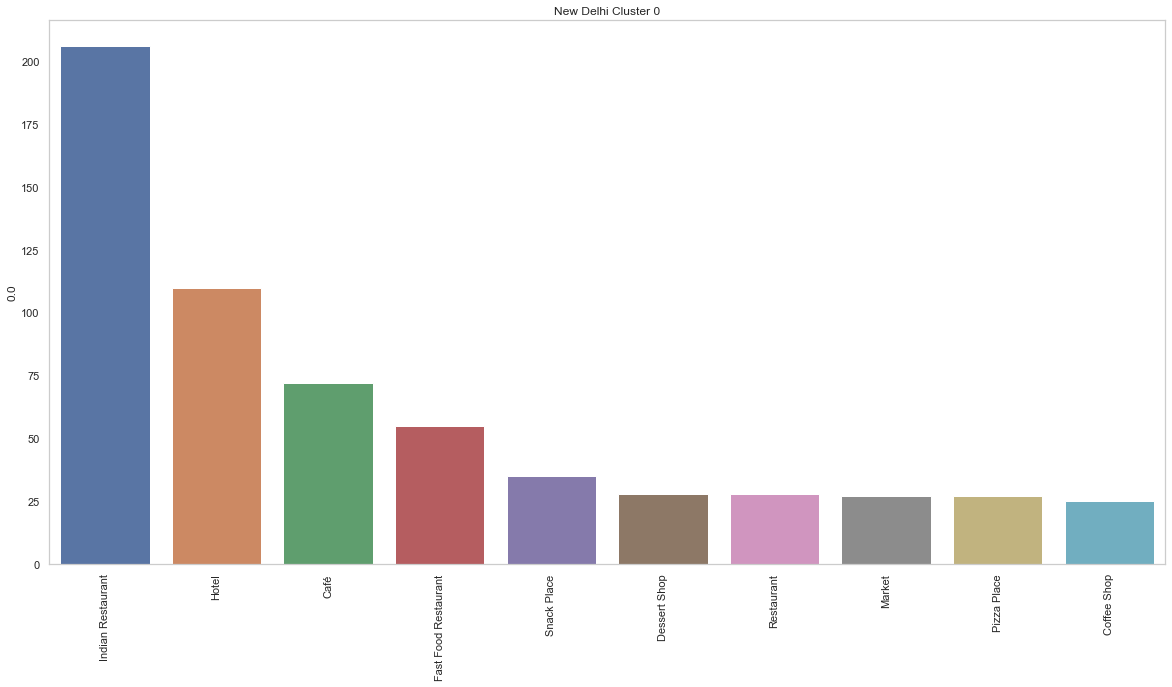

In [20]:
plot_bar_nd(0)

This cluster lists neighborhoods with their top functioning business as Indian Restaurants, followed by hotels and other eateries. This is the biggest cluster of New Delhi with a total of 60 neighborhoods listed in this cluster. The number of businesses in this cluster exceeds that of any other cluster due to the greater number of neighborhoods listed here. This cluster includes the major attractions of New Delhi due to the greater number of hotels that are present and contributing to the economy of this cluster.

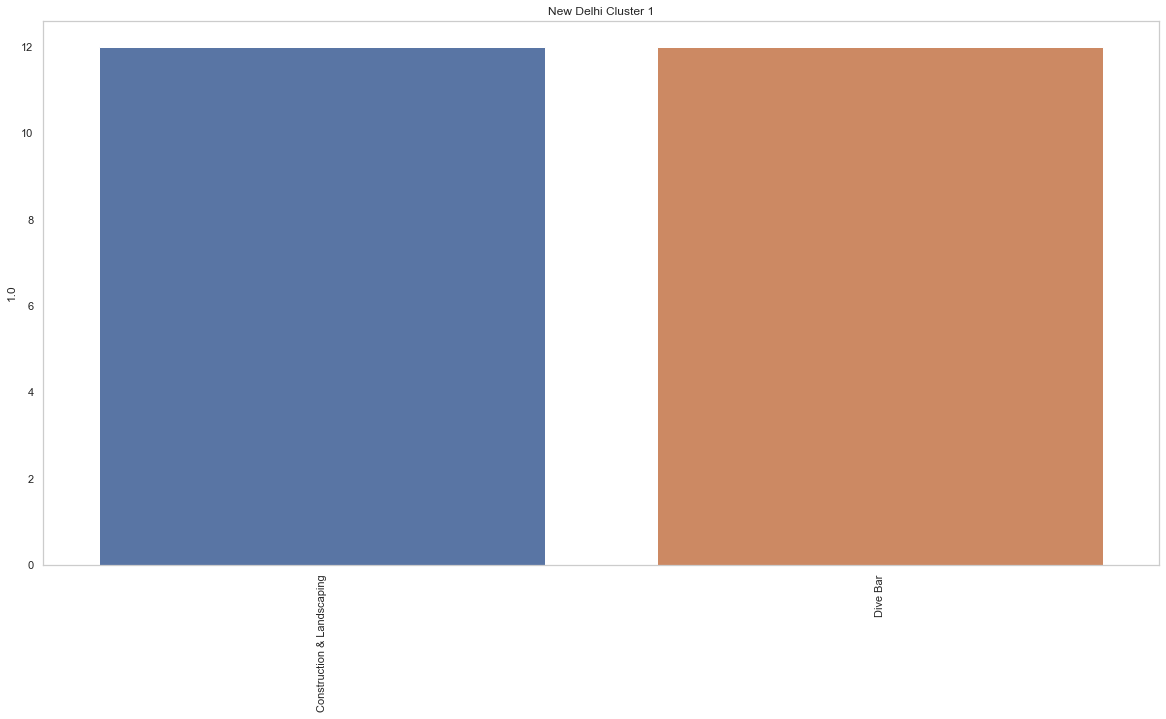

In [21]:
plot_bar_nd(1)

This cluster includes the developing portions of the city with major construction businesses present in this cluster. 

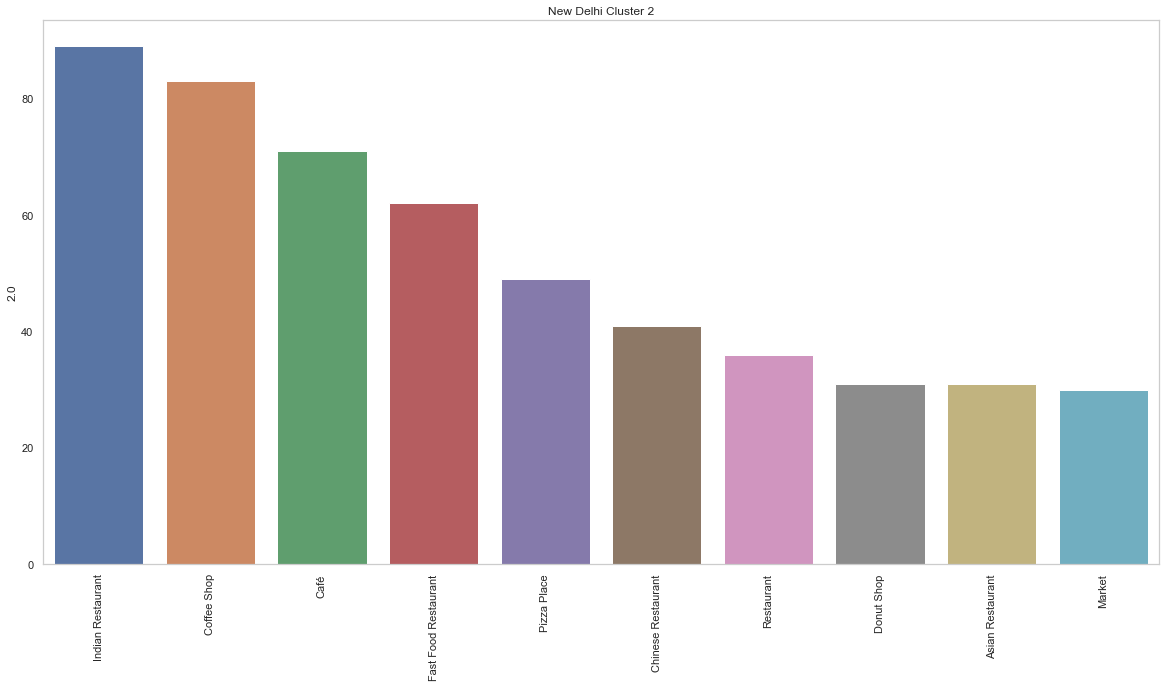

In [22]:
plot_bar_nd(2)

This cluster includes 74 no. of neighborhoods which make up 45% of the city neighborhoods. This cluster runs on eateries and is the major market area of New Delhi. The preference in eateries that the residents of New Delhi prefer is visible in this cluster. 

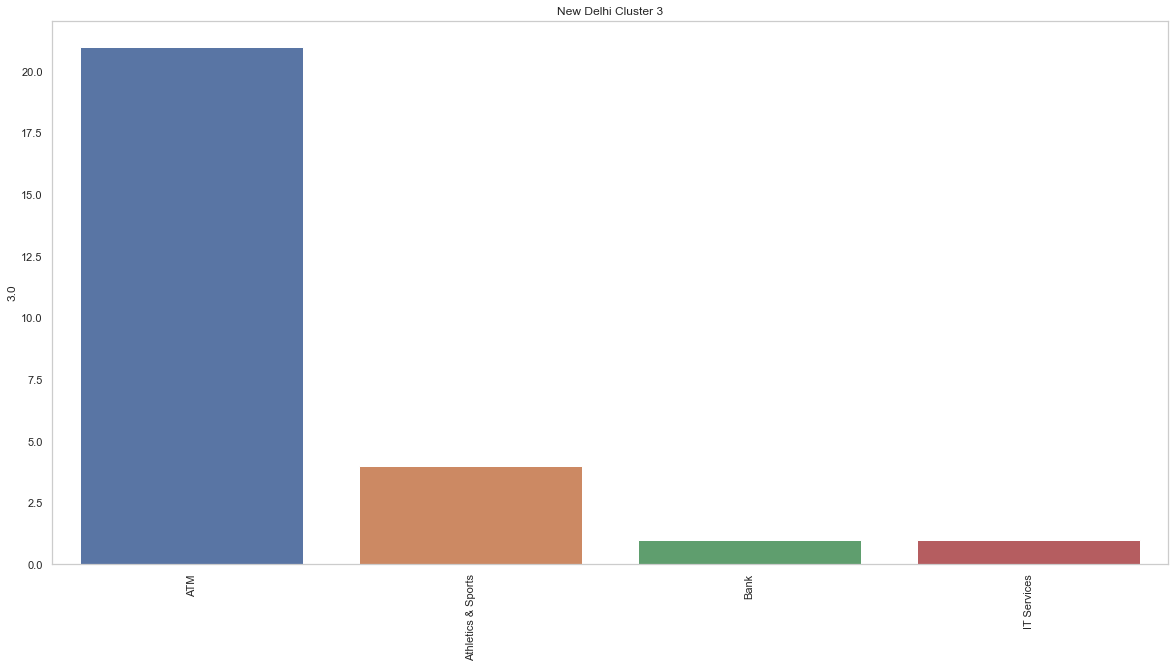

In [23]:
plot_bar_nd(3)

This cluster profits on recreational activities and provides bank and IT services. 

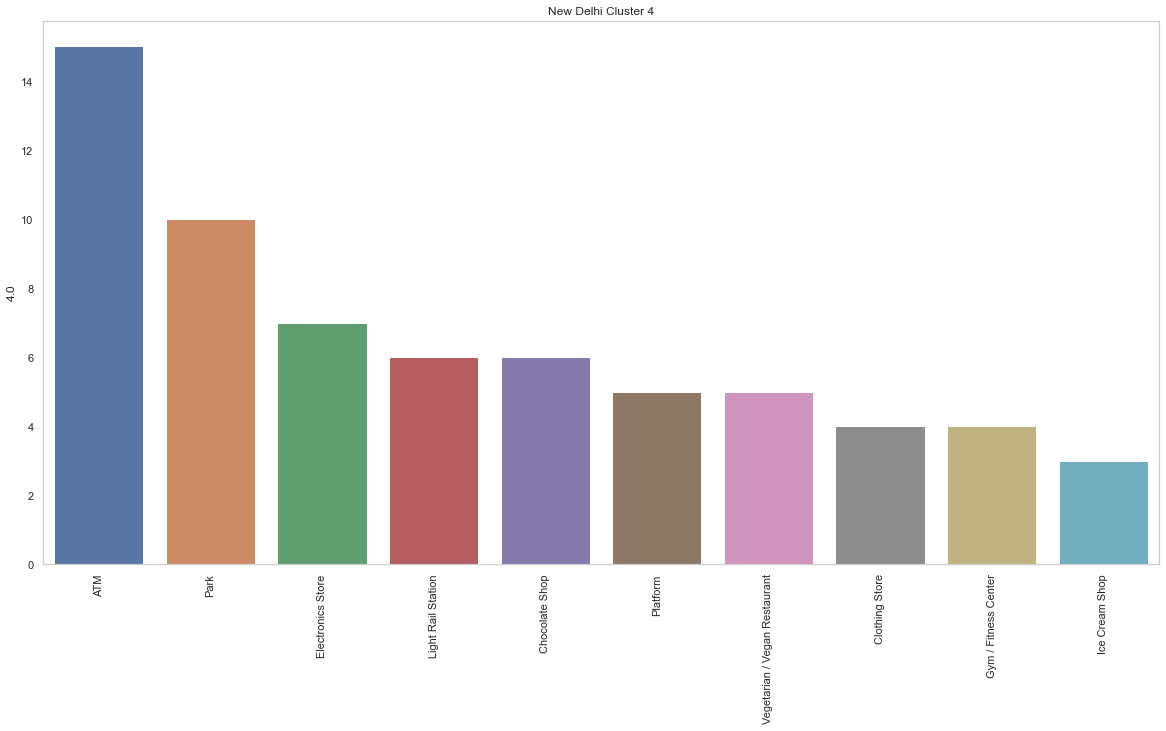

In [24]:
plot_bar_nd(4)

This cluster is a small section of Delhi which includes transport stations, parks and all sort of businesses complementing the transport business. 

<b> Analyzing the clusters of Toronto </b>

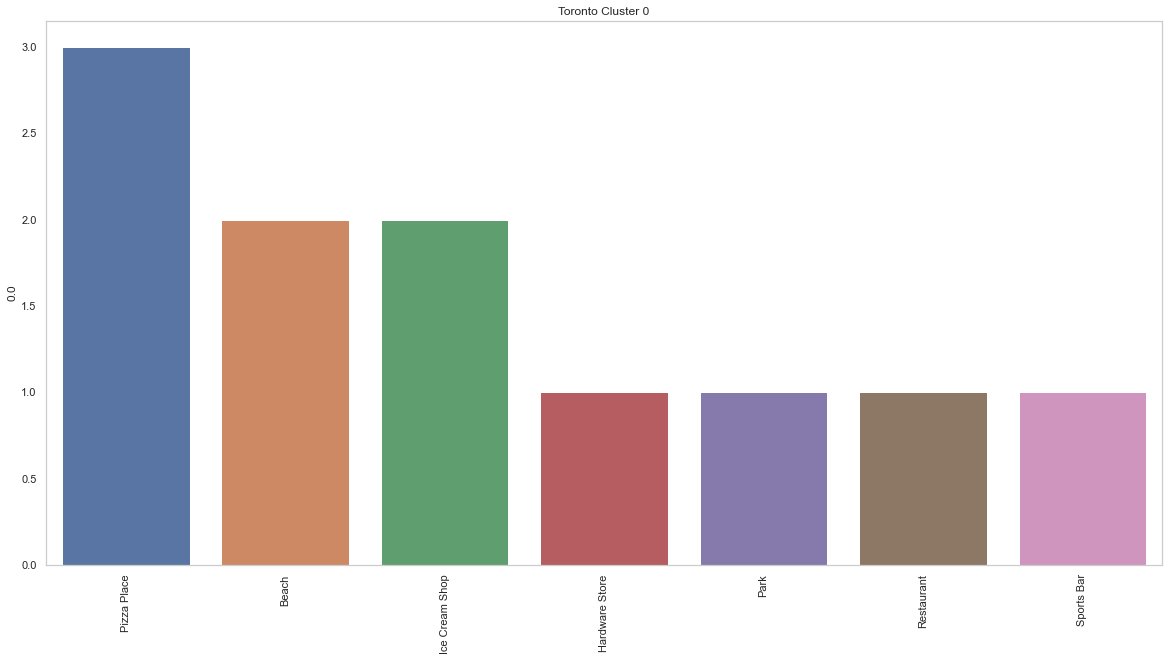

In [25]:
plot_bar_to(0)

This cluster includes recreational and leisure activities such as beaches and other businesses that compliment it.

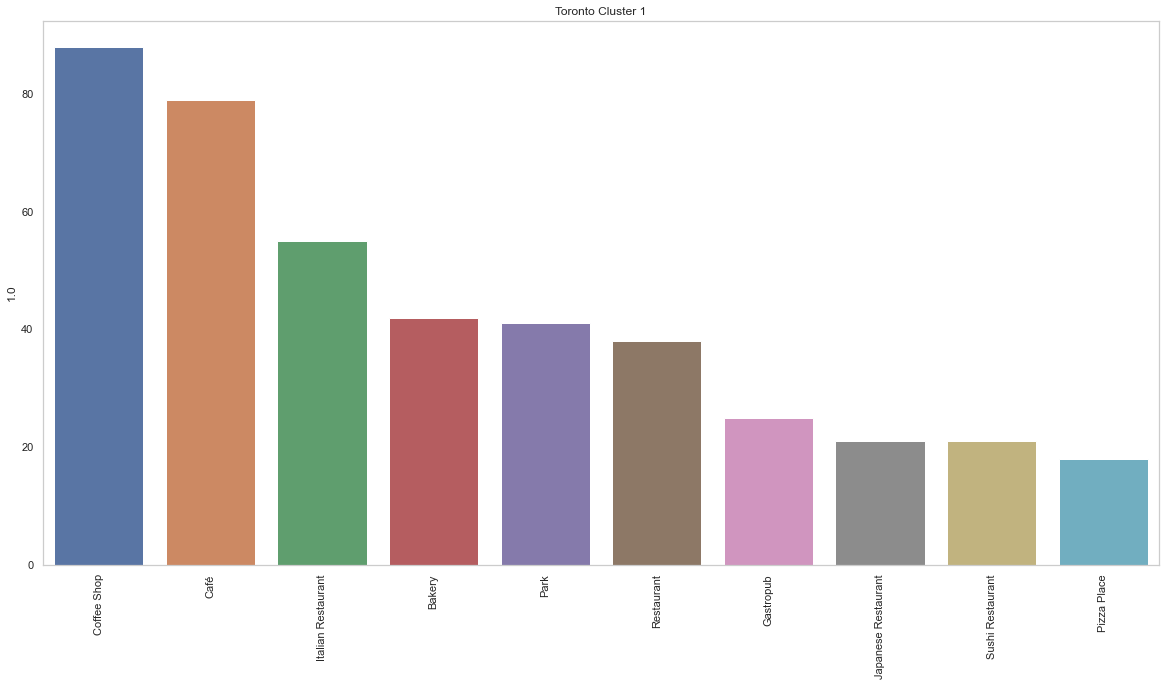

In [26]:
plot_bar_to(1)

This is one of the major clusters of Toronto. It includes 44 Boroughs in total and the major businesses operating in this cluster include eateries of one form or another. 

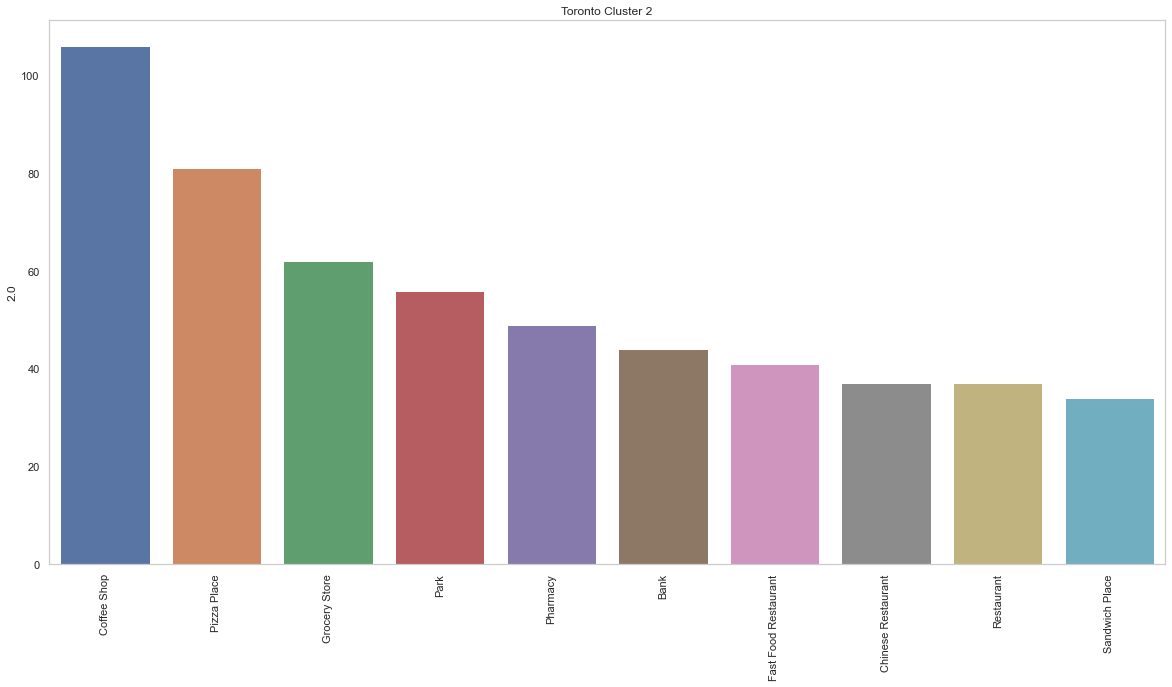

In [27]:
plot_bar_to(2)

This cluster includes 56 Boroughs which make up 54 % of the total boroughs of Toronto. This cluster pertains to businesses found around residential areas such as Grocery stores, Pharmacies, Gas stations, etc. 

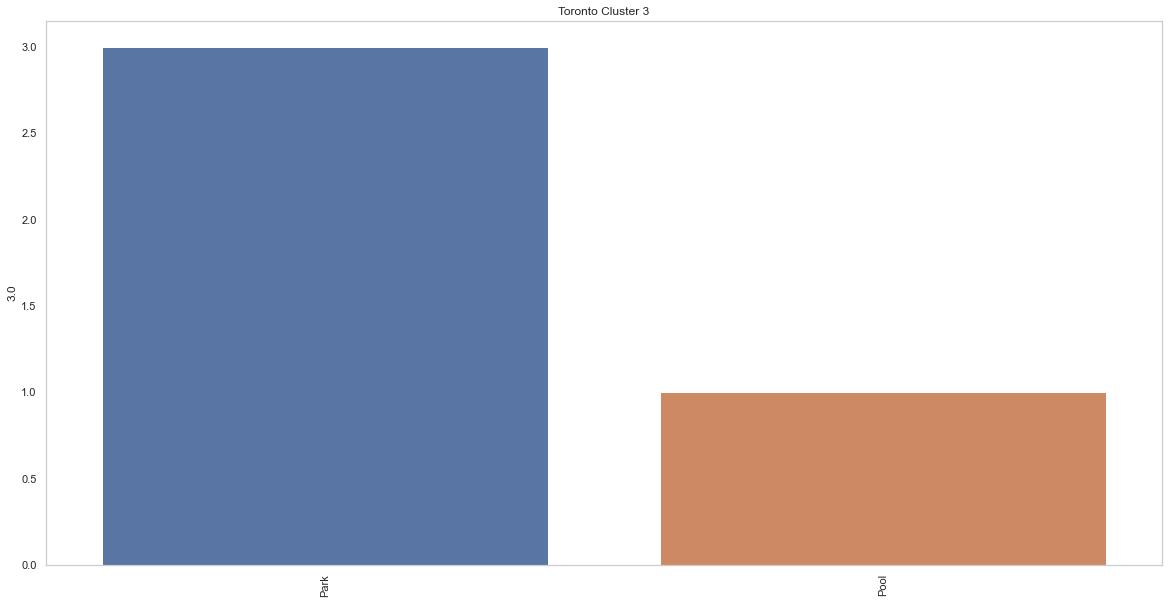

In [28]:
plot_bar_to(3)

This cluster, just like cluster number 0 is a recreational sector that includes Parks and Pool.

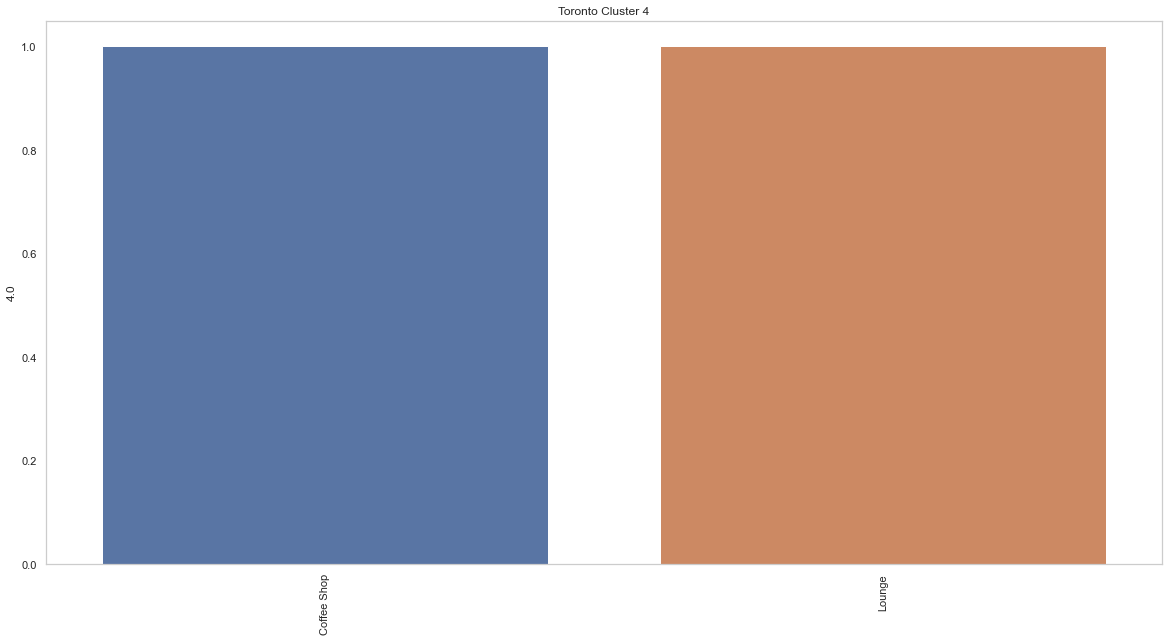

In [29]:
plot_bar_to(4)

The neighborhood included here includes a simple lounging area and a coffee shop. 

## Conclusion

The neighborhoods of New Delhi and Toronto have been segmented into 5 clusters. Each of these clusters represents different parts of the city that help us compare the types of businesses that function and majorly contribute to the economy of the two cities. 

The clusters in New Delhi were clearly differentiated based upon the level of activities that pertain to each cluster. The tourism-rich, residential and the developing sections of the city were clearly separated. The bulk of neighborhoods of Toronto, on the other hand, were listed in only two clusters. 

The businesses operating in New Delhi are numerically greater than those operating in Toronto, but the population to business ratio of Toronto far exceeds that of New Delhi. New Delhi displays a more tourism-based economy than Toronto and the variety of businesses is greater in New Delhi than in Toronto. This shows that there is a good scope of setting up businesses in New Delhi to serve its vast population.

The most dominant form of Business in both New Delhi and Toronto is that of eateries. While Indian Restaurants and Cafes make up the bulk of them in New Delhi, Coffee shops are dominating in the Toronto food space. The diversity in restaurant types is greater in Toronto than it is in New Delhi, preferably due to the greater ethnic diversity in the population of Toronto.

The marketplace of New Delhi far exceeds that of Toronto. But Toronto is better planned than New Delhi due to the proper ratio of the essential goods store that are in the residential areas of Toronto. This shows that New Delhi can benefit from the setting up of a greater number of essential goods and services stores around its residential areas. 
